# 08 Smoothing and Normalization

Smoothing and normalization are applied to the integrated spectra to remove noise and standardized the scale so that models can more easily learn patterns.

In [12]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

In [13]:
train = pd.read_csv('./training_data/07_train_int_spectra.csv', header=None)
test = pd.read_csv('./training_data/07_test_int_spectra.csv', header=None)

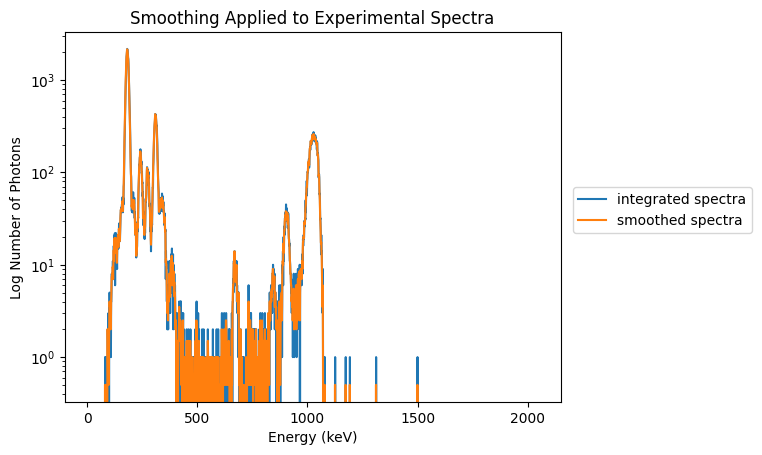

In [14]:
spectra = train.iloc[1]
smoothed = savgol_filter(spectra, 2, 1)
i_ax = np.linspace(0, spectra.size-1, spectra.size)
f_ax = np.linspace(0, smoothed.size-1, smoothed.size)
fig, axs = plt.subplots()
axs.plot(i_ax, spectra, label="integrated spectra")
axs.plot(f_ax, smoothed, label="smoothed spectra")
axs.set_yscale('log')
axs.set_ylabel('Log Number of Photons')
axs.set_xlabel('Energy (keV)')
axs.set_title("Smoothing Applied to Experimental Spectra")
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 0.6))
plt.show()

In [15]:
def smooth(row):
    row = row.clip(1, np.max(row))
    row = np.log(row)
    return savgol_filter(row, 2, 1)

In [16]:
train_smoothed = pd.DataFrame(list(train.apply(smooth, axis=1)))
test_smoothed = pd.DataFrame(list(test.apply(smooth, axis=1)))

In [17]:
flattened = train_smoothed.stack() + test_smoothed.stack()

In [18]:
spectra_mean = np.mean(flattened)
spectra_std = np.std(flattened)
print(spectra_mean)
print(spectra_std)

6.015185856537724
5.503306002869291


In [19]:
def z_score_normalize(x): 
    return (x - spectra_mean) / spectra_std

In [20]:
train_normalized = train_smoothed.apply(z_score_normalize, axis=1)
test_normalized = test_smoothed.apply(z_score_normalize, axis=1)

In [21]:
# Sanity check the modified dataframe is the same size as the original dataframe
print(train.shape)
print(train_normalized.shape)
print(test.shape)
print(test_normalized.shape)

(26597, 2048)
(26597, 2048)
(6650, 2048)
(6650, 2048)


In [22]:
train_normalized.to_csv('./training_data/08_train_int_spectra.csv', index=False, header=False)
test_normalized.to_csv('./training_data/08_test_int_spectra.csv', index=False, header=False)